In [58]:
# !pip install faker

In [59]:
import pandas as pd
import numpy as np
from faker import Faker
import random

fake = Faker()
Faker.seed(42)
random.seed(42)

# Define categories and payment methods with some typos and variations
categories = ["Electronics", "Clothing", "Grocery", "Home Decor", "Books", "Fitness", "Toys"]
payment_methods = ["Credit Card", "Debit Card", "UPI", "Cash"]

# Generate synthetic data with inconsistencies
data = []
for _ in range(50000):  
    customer_id = fake.uuid4() if random.random() > 0.02 else None  # Introduce missing values in ID
    name = fake.name() if random.random() > 0.02 else ""  # Some missing names
    age = random.choice([random.randint(18, 70), None, "unknown"])  # Introduce NaNs and "unknown"
    gender = random.choice(["Male", "Female", "male", "FEMALE", "M", "F", None])  # Inconsistencies
    location = fake.city() if random.random() > 0.05 else None  # Some missing locations
    purchase_category = random.choice(categories)  # Typos & variations
    transaction_date = random.choice([
        fake.date_between(start_date="-2y", end_date="today"), 
        fake.date_time_this_decade().strftime("%m-%d-%Y"), 
        fake.date_time_this_decade().strftime("%d/%m/%Y"),
        None])  # Messy date formats & missing dates
    transaction_amount = round(random.uniform(-500, 50000), 2)  # Outliers & negative values
    payment_method = random.choice(payment_methods)  # Inconsistent casing & typos
    loyalty_score = random.choice([random.randint(0, 100), None, "N/A"])  # Missing & non-numeric values
    
    data.append([customer_id, name, age, gender, location, purchase_category, 
                 transaction_date, transaction_amount, payment_method, loyalty_score])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    "Customer ID", "Name", "Age", "Gender", "Location", "Purchase Category", 
    "Transaction Date", "Transaction Amount", "Payment Method", "Loyalty Score"
])

# Introduce duplicate rows
df = pd.concat([df, df.sample(3000, random_state=42)])  # 3,000 duplicates

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save dataset to CSV
df.to_csv("customer_transactions.csv", index=False)

print("Messy dataset generated and saved as messy_customer_transactions.csv")


KeyboardInterrupt: 

In [ ]:
# pip install seaborn
# pip install scikit-learn
# pip install plotly

SyntaxError: invalid syntax (2405351058.py, line 3)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as pt


In [ ]:
data=pd.read_csv('customer_transactions.csv') #LOADING THE DATASET


In [4]:
data

,Customer ID,Name,Age,Gender,Location,Purchase Category,Transaction Date,Transaction Amount,Payment Method,Loyalty Score
0,dd071a30-533d-4145-ad25-cd866a6e1fc4,Amanda Carey,unknown,NaN,Jacksonview,Clothing,NaN,16895.38,Debit Card,88.0
1,a3cca111-3148-4cf8-bb43-c56989b24bba,Thomas Hines,NaN,F,Davidsonport,Books,11-08-2023,13515.98,UPI,NaN
2,fdac14fb-2ed9-429c-a8bc-4e157c033e5a,Steven Bowers,26,Male,Christinefurt,Books,NaN,24832.57,UPI,66.0
3,d8d7c190-9227-41c7-b611-3d6760ce7971,Joseph Wright,NaN,FEMALE,East Amyberg,Toys,16/01/2021,1037.24,Credit Card,NaN
4,f2588842-c0c2-4e18-b839-ad0bca6debbe,Ryan Golden,38,M,Jessicachester,Home Decor,2024-03-08,10856.37,Cash,NaN
...,...,...,...,...,...,...,...,...,...,...
52995,27f046bf-6dbf-4c22-b675-5d606dba9fef,Joyce Barry,unknown,NaN,Perrystad,Electronics,NaN,29348.52,Debit Card,44.0
52996,d8bcf8fd-3198-401c-a0d3-928dcdf3cddc,Matthew Galvan,unknown,F,South Tonyton,Electronics,2023-10-27,35182.26,Cash,72.0
52997,1d2c5253-afcd-476b-b975-651703e575b3,Mercedes Harris,NaN,F,Micheleberg,Toys,11/02/2022,9290.22,Cash,NaN
52998,cf590b8e-c860-42c4-b4da-9f0479510a45,Nicholas Carr,69,male,NaN,Home Decor,01-10-2025,18620.93,Credit Card,100.0


In [ ]:

print(data.shape) #CHEAKING FOR THE SIZE OF THE DATASET
data.info()

(53000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53000 entries, 0 to 52999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         51923 non-null  object 
 1   Name                51887 non-null  object 
 2   Age                 35449 non-null  object 
 3   Gender              45339 non-null  object 
 4   Location            50375 non-null  object 
 5   Purchase Category   53000 non-null  object 
 6   Transaction Date    39761 non-null  object 
 7   Transaction Amount  53000 non-null  float64
 8   Payment Method      53000 non-null  object 
 9   Loyalty Score       17480 non-null  float64
dtypes: float64(2), object(8)
memory usage: 4.0+ MB


In [ ]:
data.describe() #GETTING THE BASIC STATISTICAL VIEW OF DATA
list=data.columns

for i in list: #GETTING THE VALUE COUNTS OF EACH CELL IN EACH COLUMN 
    if data[i].dtype == 'object':
        print(data[i].value_counts())
        print("------------------------------------")
    else:
        pass

data['Payment Method'].value_counts()

Customer ID
8b375727-98a5-4926-b18c-2543fbd80969    2
9baa6f1c-1f6c-41c6-b685-ee519ff54cce    2
47d355e7-0381-482b-90aa-6d1302753ac5    2
5f83779e-6b57-403e-9d49-da8853175039    2
e5cff0b0-a444-4e69-aa3a-cf32aff929a8    2
                                       ..
27f046bf-6dbf-4c22-b675-5d606dba9fef    1
d8bcf8fd-3198-401c-a0d3-928dcdf3cddc    1
1d2c5253-afcd-476b-b975-651703e575b3    1
cf590b8e-c860-42c4-b4da-9f0479510a45    1
a91ca197-c299-4229-b4a4-3901357622d9    1
Name: count, Length: 48982, dtype: int64
------------------------------------
Name
James Smith        27
Michael Smith      25
Michael Brown      23
James Johnson      22
David Smith        18
                   ..
Amy Stokes          1
Robin Hawkins       1
Lawrence Martin     1
Nicole Swanson      1
Katherine Kent      1
Name: count, Length: 39535, dtype: int64
------------------------------------
Age
unknown    17728
40           373
50           370
62           367
29           366
48           363
25           362


Payment Method
Credit Card    13412
Cash           13293
UPI            13274
Debit Card     13021
Name: count, dtype: int64

In [7]:
# DROPPING DUPLICATES
data.drop_duplicates(inplace=True)  # Remove exact duplicates
data.reset_index(drop=True, inplace=True)  # Reset index after dropping duplicates
data.head()



,Customer ID,Name,Age,Gender,Location,Purchase Category,Transaction Date,Transaction Amount,Payment Method,Loyalty Score
0,dd071a30-533d-4145-ad25-cd866a6e1fc4,Amanda Carey,unknown,NaN,Jacksonview,Clothing,NaN,16895.38,Debit Card,88.0
1,a3cca111-3148-4cf8-bb43-c56989b24bba,Thomas Hines,NaN,F,Davidsonport,Books,11-08-2023,13515.98,UPI,NaN
2,fdac14fb-2ed9-429c-a8bc-4e157c033e5a,Steven Bowers,26,Male,Christinefurt,Books,NaN,24832.57,UPI,66.0
3,d8d7c190-9227-41c7-b611-3d6760ce7971,Joseph Wright,NaN,FEMALE,East Amyberg,Toys,16/01/2021,1037.24,Credit Card,NaN
4,f2588842-c0c2-4e18-b839-ad0bca6debbe,Ryan Golden,38,M,Jessicachester,Home Decor,2024-03-08,10856.37,Cash,NaN


In [ ]:
print(data['Age'].unique())  # Check if there are still non-numeric values
data['Age'] = data['Age'].replace('unknown', np.nan) #replacing the unkniwn value to nan(null) value
print(data['Age'].unique()) #checking out the unique values in Age column
data['Age'].isnull().sum() #checking if null value is present in AGe column or not
age=data['Age']
age.describe()
age.head()
#alternative method
data['Age'] = pd.to_numeric(data['Age'], errors='coerce') #changing str value datatype to numerical will null value(error='coerce')

['unknown' nan '26' '38' '63' '67' '53' '28' '49' '37' '18' '23' '65' '40'
 '45' '50' '42' '31' '68' '61' '52' '47' '55' '69' '24' '59' '21' '43'
 '70' '34' '66' '19' '39' '46' '25' '44' '64' '33' '30' '20' '48' '35'
 '36' '41' '51' '32' '60' '62' '58' '27' '56' '22' '57' '29' '54']
[nan '26' '38' '63' '67' '53' '28' '49' '37' '18' '23' '65' '40' '45' '50'
 '42' '31' '68' '61' '52' '47' '55' '69' '24' '59' '21' '43' '70' '34'
 '66' '19' '39' '46' '25' '44' '64' '33' '30' '20' '48' '35' '36' '41'
 '51' '32' '60' '62' '58' '27' '56' '22' '57' '29' '54']


In [9]:
age.unique()
#removing null values in age column
age = age.fillna(age.mode()[0])
age.unique()
age.dtype
#changing to int
data['Age']=age.astype(int)
data['Age'].dtype
data['Age'].isnull().sum() #checking for null values

np.int64(0)

In [10]:
#Transaction Date
data['Transaction Date']=pd.to_datetime(data['Transaction Date'],errors='coerce')
data['Transaction Date'].dtype
data['Transaction Date'].isnull().sum()
data['Transaction Date'] = data['Transaction Date'].fillna(method='ffill')

data['Transaction Date'].isnull().sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_27420\2749613082.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Transaction Date'] = data['Transaction Date'].fillna(method='ffill')


np.int64(1)

In [11]:
data['Transaction Date']=data['Transaction Date'].fillna(data['Transaction Date'].mode()[0])

In [12]:
#getting new columns as day and year from transaction date
data['Day']=data['Transaction Date'].dt.date
data['Year']=data['Transaction Date'].dt.year

In [13]:
data[['Year']].value_counts()
data.drop(columns='Transaction Date',axis=1,inplace=True)

In [14]:
data.columns

Index(['Customer ID', 'Name', 'Age', 'Gender', 'Location', 'Purchase Category',
       'Transaction Amount', 'Payment Method', 'Loyalty Score', 'Day', 'Year'],
      dtype='object')

In [15]:
#Transaction Amount
data['Transaction Amount'].describe()


count    50000.000000
mean     24792.094041
std      14595.918012
min       -499.670000
25%      12115.362500
50%      24825.955000
75%      37447.605000
max      49999.890000
Name: Transaction Amount, dtype: float64

In [16]:
import plotly.express as px

In [17]:

fig=px.scatter(data,
            x='Year',
            y='Transaction Amount',
            title='transaction_amount vs index')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Year=%{x}<br>Transaction Amount=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('5gcAAOcHAADnBwAA5wcAAOcHAADnBw' ... 'AA5AcAAOQHAADkBwAA6QcAAOkHAAA='),
                    'dtype': 'i4'},
              'xaxis': 'x',
              'y': {'bdata': ('H4XrUdh/0EAK16Nw/WXKQK5H4XokQN' ... 'gcJcJAUrgehTsv0kBcj8L1GCLeQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'transaction_amount vs index'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Transaction Amount'}}}
})

In [18]:
data.head()

,Customer ID,Name,Age,Gender,Location,Purchase Category,Transaction Amount,Payment Method,Loyalty Score,Day,Year
0,dd071a30-533d-4145-ad25-cd866a6e1fc4,Amanda Carey,40,NaN,Jacksonview,Clothing,16895.38,Debit Card,88.0,2022-08-13,2022
1,a3cca111-3148-4cf8-bb43-c56989b24bba,Thomas Hines,40,F,Davidsonport,Books,13515.98,UPI,NaN,2023-11-08,2023
2,fdac14fb-2ed9-429c-a8bc-4e157c033e5a,Steven Bowers,26,Male,Christinefurt,Books,24832.57,UPI,66.0,2023-11-08,2023
3,d8d7c190-9227-41c7-b611-3d6760ce7971,Joseph Wright,40,FEMALE,East Amyberg,Toys,1037.24,Credit Card,NaN,2023-11-08,2023
4,f2588842-c0c2-4e18-b839-ad0bca6debbe,Ryan Golden,38,M,Jessicachester,Home Decor,10856.37,Cash,NaN,2023-11-08,2023


In [19]:
data['Transaction Amount'].isnull().sum()
if data['Transaction Amount'][0]<0:
    print('yes')
else:
    print('no')

no


In [20]:
data.loc[data['Transaction Amount'] < 0, 'Transaction Amount'] = 0
data['Transaction Amount'].describe()

count    50000.000000
mean     24794.441387
std      14591.903207
min          0.000000
25%      12115.362500
50%      24825.955000
75%      37447.605000
max      49999.890000
Name: Transaction Amount, dtype: float64

In [21]:
data['Transaction Amount'] = data['Transaction Amount'].round(2)
data['Transaction Amount'].describe()


count    50000.000000
mean     24794.441387
std      14591.903207
min          0.000000
25%      12115.362500
50%      24825.955000
75%      37447.605000
max      49999.890000
Name: Transaction Amount, dtype: float64

In [22]:
data.head()

,Customer ID,Name,Age,Gender,Location,Purchase Category,Transaction Amount,Payment Method,Loyalty Score,Day,Year
0,dd071a30-533d-4145-ad25-cd866a6e1fc4,Amanda Carey,40,NaN,Jacksonview,Clothing,16895.38,Debit Card,88.0,2022-08-13,2022
1,a3cca111-3148-4cf8-bb43-c56989b24bba,Thomas Hines,40,F,Davidsonport,Books,13515.98,UPI,NaN,2023-11-08,2023
2,fdac14fb-2ed9-429c-a8bc-4e157c033e5a,Steven Bowers,26,Male,Christinefurt,Books,24832.57,UPI,66.0,2023-11-08,2023
3,d8d7c190-9227-41c7-b611-3d6760ce7971,Joseph Wright,40,FEMALE,East Amyberg,Toys,1037.24,Credit Card,NaN,2023-11-08,2023
4,f2588842-c0c2-4e18-b839-ad0bca6debbe,Ryan Golden,38,M,Jessicachester,Home Decor,10856.37,Cash,NaN,2023-11-08,2023


In [23]:
data['Gender'].unique()

array([nan, 'F', 'Male', 'FEMALE', 'M', 'male', 'Female'], dtype=object)

In [24]:
# Filling null values in gender
data['Gender'] = data['Gender'].replace({
    'F': 0, 'FEMALE': 0, 'Female': 0,
    'M': 1, 'Male': 1, 'MALE':1,'male': 1
})
data['Gender'].fillna(method='ffill', inplace=True)
if data['Gender'].isnull().sum()>0:
    data['Gender'].fillna(method='bfill', inplace=True)
data['Gender'].isnull().sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_27420\3852848945.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\HP\AppData\Local\Temp\ipykernel_27420\3852848945.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\HP\AppData\Local\Temp\ipykernel_27420\3852848945.py:6: FutureWarning:



np.int64(0)

In [25]:
if data['Gender'].isnull().sum()>0:
    data['Gender'].fillna(method='bfill', inplace=True)
data['Gender'].isnull().sum()

np.int64(0)

In [26]:
data['Gender'].unique()


array([0., 1.])

In [27]:
data['Gender'].value_counts()

Gender
1.0    25001
0.0    24999
Name: count, dtype: int64

In [28]:
data1=data.copy()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         48982 non-null  object 
 1   Name                48945 non-null  object 
 2   Age                 50000 non-null  int64  
 3   Gender              50000 non-null  float64
 4   Location            47524 non-null  object 
 5   Purchase Category   50000 non-null  object 
 6   Transaction Amount  50000 non-null  float64
 7   Payment Method      50000 non-null  object 
 8   Loyalty Score       16500 non-null  float64
 9   Day                 50000 non-null  object 
 10  Year                50000 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 4.0+ MB


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         48982 non-null  object 
 1   Name                48945 non-null  object 
 2   Age                 50000 non-null  int64  
 3   Gender              50000 non-null  float64
 4   Location            47524 non-null  object 
 5   Purchase Category   50000 non-null  object 
 6   Transaction Amount  50000 non-null  float64
 7   Payment Method      50000 non-null  object 
 8   Loyalty Score       16500 non-null  float64
 9   Day                 50000 non-null  object 
 10  Year                50000 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 4.0+ MB


In [31]:
data['Location'].shape

(50000,)

In [32]:
data = data.dropna(subset=['Customer ID','Name'])
data['Location']=data['Location'].fillna(method='ffill')
data['Loyalty Score']=data['Loyalty Score'].fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47946 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         47946 non-null  object 
 1   Name                47946 non-null  object 
 2   Age                 47946 non-null  int64  
 3   Gender              47946 non-null  float64
 4   Location            47946 non-null  object 
 5   Purchase Category   47946 non-null  object 
 6   Transaction Amount  47946 non-null  float64
 7   Payment Method      47946 non-null  object 
 8   Loyalty Score       47946 non-null  float64
 9   Day                 47946 non-null  object 
 10  Year                47946 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 4.2+ MB


C:\Users\HP\AppData\Local\Temp\ipykernel_27420\1044920619.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_27420\1044920619.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_27420\1044920619.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_27420\1044920619.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [33]:
data.head()


,Customer ID,Name,Age,Gender,Location,Purchase Category,Transaction Amount,Payment Method,Loyalty Score,Day,Year
0,dd071a30-533d-4145-ad25-cd866a6e1fc4,Amanda Carey,40,0.0,Jacksonview,Clothing,16895.38,Debit Card,88.0,2022-08-13,2022
1,a3cca111-3148-4cf8-bb43-c56989b24bba,Thomas Hines,40,0.0,Davidsonport,Books,13515.98,UPI,88.0,2023-11-08,2023
2,fdac14fb-2ed9-429c-a8bc-4e157c033e5a,Steven Bowers,26,1.0,Christinefurt,Books,24832.57,UPI,66.0,2023-11-08,2023
3,d8d7c190-9227-41c7-b611-3d6760ce7971,Joseph Wright,40,0.0,East Amyberg,Toys,1037.24,Credit Card,66.0,2023-11-08,2023
4,f2588842-c0c2-4e18-b839-ad0bca6debbe,Ryan Golden,38,1.0,Jessicachester,Home Decor,10856.37,Cash,66.0,2023-11-08,2023


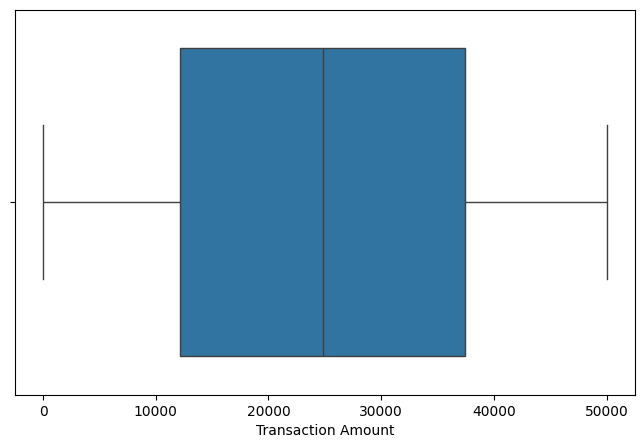

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers in numerical columns
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Transaction Amount'])
plt.show()


In [35]:
d=data.groupby('Year')['Transaction Amount'].sum().reset_index()
fig = px.line(d,
              x='Year',
              y='Transaction Amount',
              title="Transaction Amount Over Time")
fig



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Year=%{x}<br>Transaction Amount=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': '5AcAAOUHAADmBwAA5wcAAOgHAADpBwAA', 'dtype': 'i4'},
              'xaxis': 'x',
              'y': {'bdata': 'SOH6A03rq0HhehSn9I2qQWZmZroRXaxBzczMvdD/q0F7FK63FAurQc3MzPjpMH9B', 'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Transaction Amount Over Time'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Transaction Amount'}}}
})

In [36]:
d2=data.groupby('Day')['Transaction Amount'].sum().reset_index()
fig2 = px.line(d2,
              x='Day',
              y='Transaction Amount',
              title="Transaction Amount Over Time")
fig2

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Day=%{x}<br>Transaction Amount=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([datetime.date(2020, 1, 1), datetime.date(2020, 1, 2),
                          datetime.date(2020, 1, 3), ..., datetime.date(2025, 2, 20),
                          datetime.date(2025, 2, 21), datetime.date(2025, 2, 22)],
                         shape=(1877,), dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('Fa5HYWl1KkGF61E4VB8gQSlcj0KRWy' ... 'H5kDNBAAAAgK9AMkGuR+F6OqwcQQ=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Transaction Amount Over Time'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Day'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Transaction Amount'}}}
})

In [37]:
data.head()

,Customer ID,Name,Age,Gender,Location,Purchase Category,Transaction Amount,Payment Method,Loyalty Score,Day,Year
0,dd071a30-533d-4145-ad25-cd866a6e1fc4,Amanda Carey,40,0.0,Jacksonview,Clothing,16895.38,Debit Card,88.0,2022-08-13,2022
1,a3cca111-3148-4cf8-bb43-c56989b24bba,Thomas Hines,40,0.0,Davidsonport,Books,13515.98,UPI,88.0,2023-11-08,2023
2,fdac14fb-2ed9-429c-a8bc-4e157c033e5a,Steven Bowers,26,1.0,Christinefurt,Books,24832.57,UPI,66.0,2023-11-08,2023
3,d8d7c190-9227-41c7-b611-3d6760ce7971,Joseph Wright,40,0.0,East Amyberg,Toys,1037.24,Credit Card,66.0,2023-11-08,2023
4,f2588842-c0c2-4e18-b839-ad0bca6debbe,Ryan Golden,38,1.0,Jessicachester,Home Decor,10856.37,Cash,66.0,2023-11-08,2023


In [ ]:
!pip uninstall -y scipy scikit-learn
!pip install --no-cache-dir scipy scikit-learn


Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2


ERROR: Exception:
Traceback (most recent call last):
  File "E:\Machine learning projects_drive\Customer Spending Behavior Analysis\project_env\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "E:\Machine learning projects_drive\Customer Spending Behavior Analysis\project_env\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "E:\Machine learning projects_drive\Customer Spending Behavior Analysis\project_env\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "E:\Machine learning projects_drive\Customer Spending Behavior Analysis\project_env\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "E:\Machine learning projects_drive\Customer Spending Behavior Analysis\project_env\Lib\site-packages\pip\_internal\utils\t

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/b9/8b/7ec1832b09dbc88f3db411f8cdd47db04505c4b72c99b11c920a8f0479c3/scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 217.9 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 459.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.2 MB 8.9 MB/s eta 0:00:05
    --------------------------------------- 1.0/41.2 MB 12.6 MB/s eta 0:00:04
   - -------------------------------------- 1.8/41.2 MB 14.0 MB/s eta 0:00:03
   -- ------------------------------------- 2.1/41.2 MB 13.5 MB/s eta 0:00:03
   -- -----------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 47946 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         47946 non-null  object 
 1   Name                47946 non-null  object 
 2   Age                 47946 non-null  int64  
 3   Gender              47946 non-null  float64
 4   Location            47946 non-null  object 
 5   Purchase Category   47946 non-null  object 
 6   Transaction Amount  47946 non-null  float64
 7   Payment Method      47946 non-null  object 
 8   Loyalty Score       47946 non-null  float64
 9   Day                 47946 non-null  object 
 10  Year                47946 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 4.2+ MB


(47946, 11)

In [50]:
data.to_csv("Cleaned_data",index=False)

In [51]:
c_data=pd.read_csv("Cleaned_data")

In [39]:
### Customer Segmentation using Clustering

#### **Model 1: K-Means Clustering**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [52]:
c_data.head()

,Customer ID,Name,Age,Gender,Location,Purchase Category,Transaction Amount,Payment Method,Loyalty Score,Day,Year
0,dd071a30-533d-4145-ad25-cd866a6e1fc4,Amanda Carey,40,0.0,Jacksonview,Clothing,16895.38,Debit Card,88.0,2022-08-13,2022
1,a3cca111-3148-4cf8-bb43-c56989b24bba,Thomas Hines,40,0.0,Davidsonport,Books,13515.98,UPI,88.0,2023-11-08,2023
2,fdac14fb-2ed9-429c-a8bc-4e157c033e5a,Steven Bowers,26,1.0,Christinefurt,Books,24832.57,UPI,66.0,2023-11-08,2023
3,d8d7c190-9227-41c7-b611-3d6760ce7971,Joseph Wright,40,0.0,East Amyberg,Toys,1037.24,Credit Card,66.0,2023-11-08,2023
4,f2588842-c0c2-4e18-b839-ad0bca6debbe,Ryan Golden,38,1.0,Jessicachester,Home Decor,10856.37,Cash,66.0,2023-11-08,2023


In [56]:
c_data.shape
c_data.columns
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47946 entries, 0 to 47945
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         47946 non-null  object 
 1   Name                47946 non-null  object 
 2   Age                 47946 non-null  int64  
 3   Gender              47946 non-null  float64
 4   Location            47946 non-null  object 
 5   Purchase Category   47946 non-null  object 
 6   Transaction Amount  47946 non-null  float64
 7   Payment Method      47946 non-null  object 
 8   Loyalty Score       47946 non-null  float64
 9   Day                 47946 non-null  object 
 10  Year                47946 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 4.0+ MB


In [106]:
x=c_data.iloc[:,[6,8]].values
x

array([[16895.38,    88.  ],
       [13515.98,    88.  ],
       [24832.57,    66.  ],
       ...,
       [ 9290.22,    72.  ],
       [18620.93,   100.  ],
       [30856.39,   100.  ]], shape=(47946, 2))

In [107]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

[10196365717499.469, 2538867634374.8154, 1135402344959.1125, 635621974772.8264, 407410025030.81647, 282119478987.9118, 206652570912.33344, 159279969729.44604, 125463553047.4147, 104159115753.02406, 83763098768.91917, 70471116574.15361, 61612347853.721306, 53688236658.82125, 46233679885.20007, 40461292499.90321, 36813491284.57866, 31969568912.79605, 28352942017.559692]


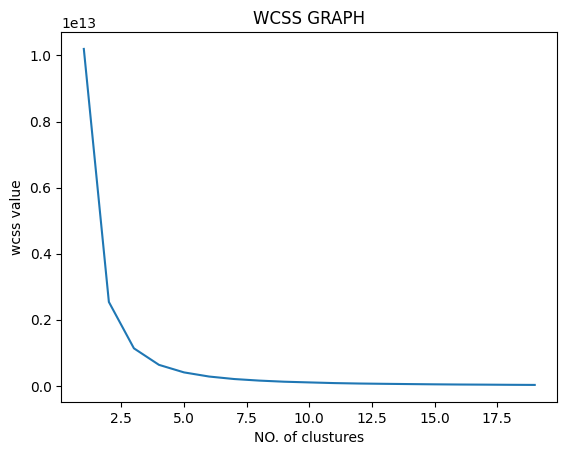

In [108]:
plt.plot(range(1,20),wcss)
plt.title("WCSS GRAPH")
plt.xlabel("NO. of clustures")
plt.ylabel("wcss value")
plt.show()


In [116]:
x=c_data.sample(1000)
x=x.iloc[:,[6,8]].values
x
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=2)
kmeans.fit(x)
wcss.append(kmeans.inertia_)
wcss
y=kmeans.predict(x)
y


array([3, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 0, 3, 4, 4, 2, 4, 1, 1, 0, 0, 2,
       3, 4, 2, 4, 0, 4, 0, 2, 1, 2, 2, 2, 4, 3, 0, 2, 1, 0, 3, 0, 1, 0,
       3, 2, 3, 4, 0, 1, 4, 4, 3, 4, 2, 2, 3, 4, 0, 2, 3, 1, 2, 0, 4, 4,
       3, 3, 3, 0, 2, 0, 1, 1, 4, 4, 1, 3, 1, 3, 2, 0, 3, 1, 1, 2, 1, 1,
       4, 4, 4, 0, 2, 4, 4, 3, 4, 2, 4, 3, 0, 1, 0, 4, 1, 0, 3, 3, 2, 4,
       2, 1, 0, 2, 0, 1, 4, 3, 3, 3, 2, 0, 0, 1, 1, 1, 3, 3, 4, 3, 3, 4,
       3, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 4, 1, 0, 2, 4, 2, 2, 3,
       2, 0, 3, 3, 1, 0, 1, 2, 2, 2, 1, 4, 1, 2, 0, 2, 4, 4, 1, 0, 0, 3,
       1, 2, 3, 4, 4, 1, 3, 0, 0, 1, 2, 0, 4, 0, 2, 2, 3, 3, 3, 0, 0, 3,
       4, 4, 0, 4, 0, 1, 2, 2, 3, 2, 3, 3, 0, 1, 0, 1, 4, 1, 3, 1, 1, 2,
       4, 0, 0, 2, 3, 3, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 1,
       3, 4, 1, 2, 0, 4, 2, 4, 4, 3, 0, 2, 1, 4, 4, 3, 1, 1, 3, 4, 0, 4,
       2, 2, 0, 4, 4, 1, 1, 2, 3, 4, 1, 3, 3, 3, 1, 3, 1, 0, 0, 1, 0, 2,
       2, 0, 2, 1, 2, 3, 3, 1, 4, 3, 0, 3, 2, 1, 2,

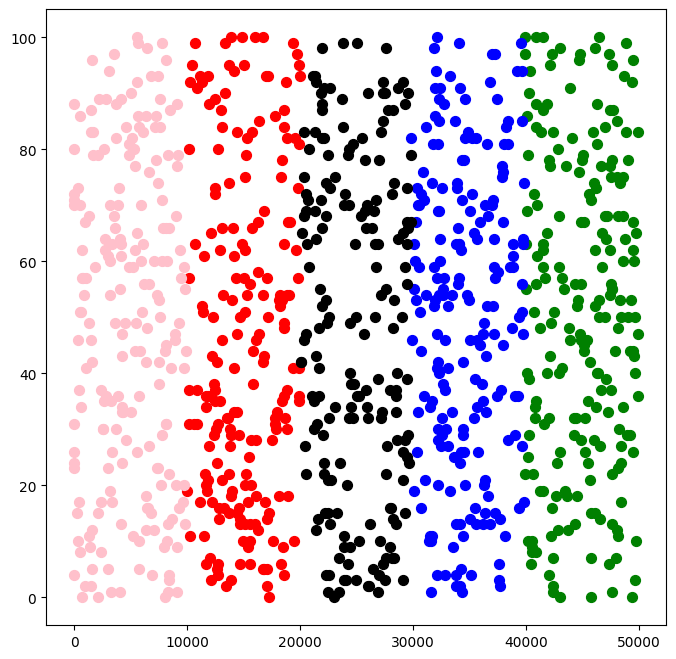

In [117]:
a=([[57,33100.00]])
b=kmeans.predict(a)
b

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='pink',label='cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='black',label='cluster5')


In [1]:

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Generate Fake Customer Transaction Data
np.random.seed(42)
data = {
    "Customer_ID": np.arange(1, 10001),  # 10,000 Customers
    "Age": np.random.randint(18, 65, 10000),
    "Gender": np.random.choice(["Male", "Female"], 10000),
    "Income": np.random.randint(20000, 120000, 10000),
    "Transaction_History": np.random.randint(1, 50, 10000),
    "Avg_Transaction_Value": np.random.randint(100, 10000, 10000),
    "Total_Transactions": np.random.randint(10, 200, 10000),
    "Days_Since_Last_Transaction": np.random.randint(1, 365, 10000),
}

df = pd.DataFrame(data)

# Target Variable: Transaction Amount
df["Transaction_Amount"] = (
    df["Avg_Transaction_Value"] * np.random.uniform(0.8, 1.2, 10000)
)  # Adding random variance

# Splitting Features & Target
X = df.drop(columns=["Customer_ID", "Transaction_Amount"])  # Features
y = df["Transaction_Amount"]  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify Column Types
numerical_features = ["Age", "Income", "Transaction_History", "Avg_Transaction_Value", "Total_Transactions", "Days_Since_Last_Transaction"]
categorical_features = ["Gender"]

# Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

# Model Pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train Model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [10, 20, None]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict with Best Model
final_predictions = best_model.predict(X_test)
print("Final RMSE:", np.sqrt(mean_squared_error(y_test, final_predictions)))


Model Performance:
RMSE: 689.49
R² Score: 0.95
Best Parameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
Final RMSE: 675.6120447161234
